## FEEDFORWARD(MNIST)



In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

### INBUILT DATASET

In [2]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


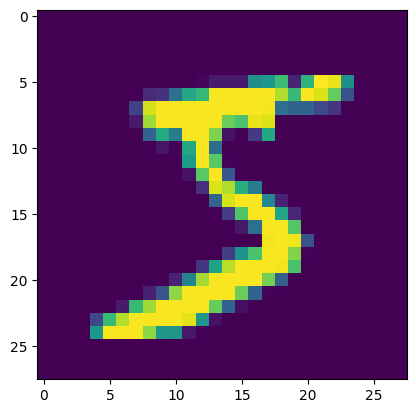

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train = x_train / 255
x_test = x_test / 255

### CSV DATASET

In [7]:
# test = pd.read_csv("mnist_test.csv")
# train = pd.read_csv("mnist_train.csv")

In [8]:
# x_train = train.drop("label", axis=1).values
# x_test = test.drop("label", axis=1).values

# y_train = train["label"].values
# y_test = test["label"].values

In [9]:
# x_train = x_train.reshape(-1, 28, 28)
# x_test = x_test.reshape(-1, 28, 28)

In [10]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

### JPG DATASET

In [11]:
# train_data_dir = 'mnist-jpg/train'
# test_data_dir = 'mnist-jpg/test'

# # Image data generator for training data
# train_datagen = ImageDataGenerator(
# rescale=1.0/255
# )

# # Image data generator for testing data
# test_datagen = ImageDataGenerator(
# rescale=1.0/255
# )

# # Create data generators
# train_batch_size = 10000
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(28, 28),  # Resize images to 28x28
#     batch_size=train_batch_size,
#     class_mode='categorical', 
#      color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
#     shuffle=True,
# )

# # Load test data without labels (class_mode=None)
# test_batch_size = 2000
# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(28, 28),  # Resize images to 28x28
#     batch_size=test_batch_size,
#     class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
#       color_mode='grayscale',
#     shuffle=True,
# )

In [12]:
# x_train, y_train = train_generator[0]
# x_test, y_test = test_generator[0]

In [13]:
#Designing model
model= Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# model = Sequential([
#     Dense(784, "relu"),
#     Dense(64, "relu"),
#     Dropout(0.2),
#     Dense(10, "softmax")
# ])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#Train model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.summary()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7380 - loss: 1.0099 - val_accuracy: 0.9021 - val_loss: 0.3585
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8996 - loss: 0.3542 - val_accuracy: 0.9185 - val_loss: 0.2948
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9166 - loss: 0.2954 - val_accuracy: 0.9282 - val_loss: 0.2599
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9263 - loss: 0.2630 - val_accuracy: 0.9319 - val_loss: 0.2371
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9321 - loss: 0.2395 - val_accuracy: 0.9372 - val_loss: 0.2207
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9386 - loss: 0.2204 - val_accuracy: 0.9412 - val_loss: 0.2067
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9413 - loss: 0.2039 - val_accuracy: 0.9435 - val_loss: 0.1939
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9446 - loss: 0.1934 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
#evaluating model
test_loss, test_acc= model.evaluate(x_test, y_test)
print("loss=", test_loss)
print("accuracy=", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9424 - loss: 0.1945
loss= 0.1662793606519699
accuracy= 0.9506000280380249


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual:  9
predicted:  9


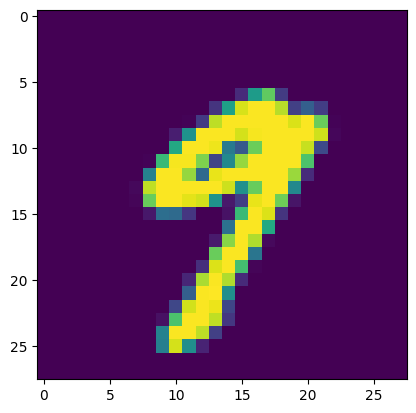

In [16]:
#making new prediction
n=20
plt.imshow(x_test[n])
predicted_values=model.predict(x_test)
print("actual: ", y_test[n])
print("predicted: ", np.argmax(predicted_values[n]))

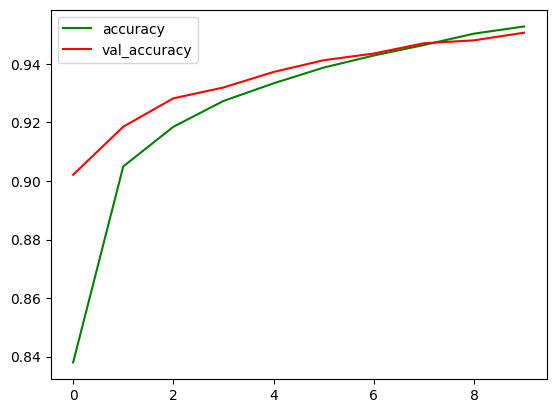

In [17]:
#Plotting
plt.plot(history.history['accuracy'], label='accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()

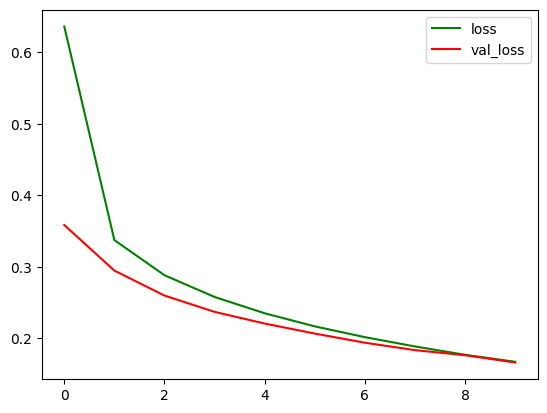

In [18]:
plt.plot(history.history['loss'], label='loss', color='green')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.legend()